# E-Mail classification NLP (step 2)

## Text classification data

### Classification of text data using fully connected neural networks

***Get dataset from Google Drive:***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#from nltk.tokenize import word_tokenize
#from nltk.corpus import stopwords
#from nltk.stem import WordNetLemmatizer

from collections import Counter
import re
import string


#url_testDATA='https://drive.google.com/file/d/1q8_G19zYuD4C2l8u4CrGe_yiitjI1h2I/view?usp=sharing'
url_trainDATA='https://drive.google.com/file/d/1HqD1LueAC1We0Bgum4qNxxCU6VJZW3yW/view?usp=sharing'

#https://www.kaggle.com/datatattle/email-classification-nlp?select=SMS_train.csv
url=url_trainDATA
file_id=url.split('/')[-2]
print('LOG file id = ',file_id)
dwn_url='https://drive.google.com/uc?id=' + file_id
print('LOG download url = ', dwn_url)

df = pd.read_csv(dwn_url, encoding = "ISO-8859-1")

LOG file id =  1HqD1LueAC1We0Bgum4qNxxCU6VJZW3yW
LOG download url =  https://drive.google.com/uc?id=1HqD1LueAC1We0Bgum4qNxxCU6VJZW3yW


In [2]:
df.head()

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam


***Remowe extra columns:***

In [3]:
df.drop(['S. No.'], axis = 1, inplace = True)

In [4]:
X_train = df.Message_body
Y_train = df.Label

print("\nTEXT OF THE MESSAGE:\n",  X_train)
print("\nCLASSIFICATION:\n", Y_train)


TEXT OF THE MESSAGE:
 0                             Rofl. Its true to its name
1      The guy did some bitching but I acted like i'd...
2      Pity, * was in mood for that. So...any other s...
3                   Will ü b going to esplanade fr home?
4      This is the 2nd time we have tried 2 contact u...
                             ...                        
952    hows my favourite person today? r u workin har...
953                        How much you got for cleaning
954    Sorry da. I gone mad so many pending works wha...
955                                   Wat time ü finish?
956                      Just glad to be talking to you.
Name: Message_body, Length: 957, dtype: object

CLASSIFICATION:
 0      Non-Spam
1      Non-Spam
2      Non-Spam
3      Non-Spam
4          Spam
         ...   
952    Non-Spam
953    Non-Spam
954    Non-Spam
955    Non-Spam
956    Non-Spam
Name: Label, Length: 957, dtype: object


In [5]:
df.head()

,Message_body,Label
0,Rofl. Its true to its name,Non-Spam
1,The guy did some bitching but I acted like i'd...,Non-Spam
2,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,Will ü b going to esplanade fr home?,Non-Spam
4,This is the 2nd time we have tried 2 contact u...,Spam


In [6]:
df = df[(df.Label == 'Non-Spam') | (df.Label == 'Spam')]
print(df)

                                          Message_body     Label
0                           Rofl. Its true to its name  Non-Spam
1    The guy did some bitching but I acted like i'd...  Non-Spam
2    Pity, * was in mood for that. So...any other s...  Non-Spam
3                 Will ü b going to esplanade fr home?  Non-Spam
4    This is the 2nd time we have tried 2 contact u...      Spam
..                                                 ...       ...
952  hows my favourite person today? r u workin har...  Non-Spam
953                      How much you got for cleaning  Non-Spam
954  Sorry da. I gone mad so many pending works wha...  Non-Spam
955                                 Wat time ü finish?  Non-Spam
956                    Just glad to be talking to you.  Non-Spam

[957 rows x 2 columns]


In [7]:
def Sort_Sp_NSp(text):
    if text in ['Non-Spam']:
        return 'important_message'
    elif text in ['Spam']:
        return 'spammmm'
    else:
        return text

In [8]:
df.Label = df.Label.apply(Sort_Sp_NSp)
print(df.Label)

0      important_message
1      important_message
2      important_message
3      important_message
4                spammmm
             ...        
952    important_message
953    important_message
954    important_message
955    important_message
956    important_message
Name: Label, Length: 957, dtype: object


In [9]:
X_train = df.Message_body
Y_train = df.Label

In [10]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = stopwords.words("english")
def clean_text(text):
    text = text.lower()           # converting to lowercase
    text = re.sub("@\S+", " ", text)  
    text = re.sub("https*\S+", " ", text)      #\S - не пробел 
    text = re.sub("www\S+", " ", text)
    text = re.sub("#\S+", " ", text)
    text = re.sub("\d", " ", text)        # remove all numbers
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)     # remove punctuations
    text = re.sub('\n', ' ', text)        
    text = re.sub('\s{2,}',' ', text)        # remove extra spaces
    text = ' '.join([word for word in text.split(' ') if word not in stop_words])
    return text

In [11]:
def digital_label(text):
    if text == 'important_message':
        return 1.0
    elif text == 'spammmm':
        return 0.0


In [12]:
X_train = X_train.apply(clean_text)
Y_train = Y_train.apply(digital_label)

In [13]:
print(X_train)
print(Y_train)

0                                         rofl true name
1      guy bitching acted like interested buying some...
2                                 pity mood suggestions 
3                           ü b going esplanade fr home 
4      nd time tried contact u u £ pound prize claim ...
                             ...                        
952    hows favourite person today r u workin hard sl...
953                                    much got cleaning
954                sorry da gone mad many pending works 
955                                   wat time ü finish 
956                                        glad talking 
Name: Message_body, Length: 957, dtype: object
0      1.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
952    1.0
953    1.0
954    1.0
955    1.0
956    1.0
Name: Label, Length: 957, dtype: float64


In [14]:
whole_text = ""
for i in X_train:
    whole_text += i + ' '

In [15]:
print(whole_text)

rofl true name guy bitching acted like interested buying something else next week gave us free pity mood suggestions  ü b going esplanade fr home  nd time tried contact u u £ pound prize claim easy call p per minute bt national rate  reminder get pounds free call credit details great offers pls reply text valid name house postcode huh lei  wait til least wednesday see get  ard like dat lor  ok lor sony ericsson salesman ask shuhui say quite gd use considering  get dump heap mom decided come lowes boring  anything lor juz us lor  next lt hours imma flip shit sorry call later meant calculation lt units lt school really expensive started practicing accent important decided years dental school nmde exam  yes u texted pshew missing much yeh indians nice tho kane bit shud go drink sometime soon mite hav go da works laugh soon love pete x x well keep mind got enough gas one round trip barring sudden influx cash hahaha use brain dear safe trip nigeria wish happiness soon company share moments 

In [16]:
tokens = word_tokenize(whole_text)
lemmatizer = WordNetLemmatizer()
lemtok = [lemmatizer.lemmatize(t) for t in tokens]
dictionary = list(set(lemtok))

In [17]:
print(dictionary)

['lie', 'wrk', 'vikky', 'watched', 'handle', 'adsense', 'jason', 'national', 'fromm', 'macho', 'keep', 'predicte', 'grahmbell', 'december', 'bless', 'astronomer', 'special', 'tirupur', 'may', 'drink', 'ramen', 'isnt', 'console', 'apparently', 'giving', 'plz', 'limiting', 'hanging', 'respond', 'actually', 'darren', 'somebody', 'hahaha', 'wrong', 'tough', 'company', 'swat', 'gas', 'something', 'offense', 'blood', 'panther', 'loving', 'imagine', 'wedding', 'tho', 'violence', 'chest', 'towards', 'true', 'pete', 'vomit', 'dog', 'vomiting', 'healthy', 'gd', 'paragon', 'wc', 'access', 'dont', 'wake', 'slightly', 'wear', 'dai', 'job', 'treacle', 'pray', 'get', 'planning', 'dreading', 'mobileupd', 'eatin', 'wrc', 'iam', 'official', 'txtauction', 'difference', 'sed', 'pay', 'face', 'loyal', 'hell', 'rather', 'purchase', 'ceiling', 'bother', 'english', 'yr', 'completely', 'tv', 'warranty', 'chase', 'skype', 'trying', 'date', 'luvs', 'huge', 'ajith', 'scream', 'upon', 'checked', 'ml', 'hassling', 

In [18]:
len(dictionary)

2638

In [19]:
def convert(text):
    tok = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    lem = [lemmatizer.lemmatize(t) for t in tok]
    res = [dictionary.index(i) for i in lem]
    return res

In [20]:
X_train = X_train.apply(convert)
print(X_train)

0                                       [2121, 49, 2077]
1      [1279, 2094, 776, 111, 1747, 709, 38, 1131, 44...
2                                      [1455, 1267, 216]
3                   [1311, 2624, 2028, 2527, 2045, 1079]
4      [2435, 849, 1432, 941, 1092, 1092, 902, 1614, ...
                             ...                        
952    [2297, 1576, 1028, 1819, 1449, 1092, 1109, 209...
953                                    [2421, 2031, 684]
954             [558, 2333, 1711, 813, 1674, 2135, 1868]
955                               [1119, 849, 1311, 877]
956                                         [2634, 1447]
Name: Message_body, Length: 957, dtype: object


In [21]:
def vectorize_sequences(sequences, dimension = 30000):#dims
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

In [22]:
import numpy as np

x_train = vectorize_sequences(X_train)
print(x_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [23]:
y_train = np.asarray(Y_train).astype("float32")

print(y_train)

[1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.

In [24]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history = model.fit(x_train,
                    y_train,
                    epochs=10,
                    batch_size=512,
                    validation_split=0.2,
                    shuffle = True,
                    verbose = 2)

Epoch 1/10
2/2 - 1s - loss: 0.6817 - accuracy: 0.7673 - val_loss: 0.6481 - val_accuracy: 0.9323 - 1s/epoch - 584ms/step
Epoch 2/10
2/2 - 0s - loss: 0.6269 - accuracy: 0.9895 - val_loss: 0.6127 - val_accuracy: 0.9323 - 166ms/epoch - 83ms/step
Epoch 3/10
2/2 - 0s - loss: 0.5819 - accuracy: 0.9895 - val_loss: 0.5852 - val_accuracy: 0.9375 - 172ms/epoch - 86ms/step
Epoch 4/10
2/2 - 0s - loss: 0.5454 - accuracy: 0.9922 - val_loss: 0.5620 - val_accuracy: 0.9375 - 178ms/epoch - 89ms/step
Epoch 5/10
2/2 - 0s - loss: 0.5145 - accuracy: 0.9922 - val_loss: 0.5411 - val_accuracy: 0.9375 - 206ms/epoch - 103ms/step
Epoch 6/10
2/2 - 0s - loss: 0.4874 - accuracy: 0.9922 - val_loss: 0.5221 - val_accuracy: 0.9375 - 209ms/epoch - 105ms/step
Epoch 7/10
2/2 - 0s - loss: 0.4633 - accuracy: 0.9922 - val_loss: 0.5052 - val_accuracy: 0.9427 - 189ms/epoch - 94ms/step
Epoch 8/10
2/2 - 0s - loss: 0.4413 - accuracy: 0.9922 - val_loss: 0.4893 - val_accuracy: 0.9479 - 165ms/epoch - 82ms/step
Epoch 9/10
2/2 - 0s - lo

In [27]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                960032    
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 960,065
Trainable params: 960,065
Non-trainable params: 0
_________________________________________________________________
None


In [28]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

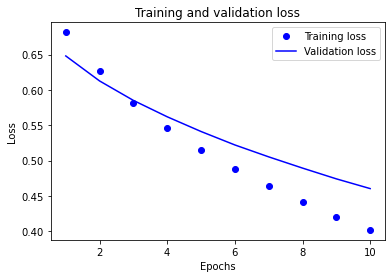

In [25]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [26]:
score = model.evaluate(x_train, y_train, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.4008227586746216
Test accuracy: 0.985370934009552
